In [35]:
import streamlit as st
import pandas as pd
import base64
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import yfinance as yf

In [36]:
def load_data():
    url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
    html = pd.read_html(url, header = 0)
    df = html[0]
    return df

In [37]:
df = load_data()
sector = df.groupby('GICS Sector')

In [38]:
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
html = pd.read_html(url, header = 0)
#df = html[0]

In [39]:
html

[    Symbol            Security             GICS Sector  \
 0      MMM                  3M             Industrials   
 1      AOS         A. O. Smith             Industrials   
 2      ABT              Abbott             Health Care   
 3     ABBV              AbbVie             Health Care   
 4      ACN           Accenture  Information Technology   
 ..     ...                 ...                     ...   
 498    XYL          Xylem Inc.             Industrials   
 499    YUM         Yum! Brands  Consumer Discretionary   
 500   ZBRA  Zebra Technologies  Information Technology   
 501    ZBH       Zimmer Biomet             Health Care   
 502    ZTS              Zoetis             Health Care   
 
                                 GICS Sub-Industry    Headquarters Location  \
 0                        Industrial Conglomerates    Saint Paul, Minnesota   
 1                               Building Products     Milwaukee, Wisconsin   
 2                           Health Care Equipment  N

In [40]:
df

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,XYL,Xylem Inc.,Industrials,Industrial Machinery & Supplies & Components,"White Plains, New York",2011-11-01,1524472,2011
499,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
500,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
501,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


In [41]:
df['GICS Sub-Industry'].unique()

array(['Industrial Conglomerates', 'Building Products',
       'Health Care Equipment', 'Biotechnology',
       'IT Consulting & Other Services', 'Application Software',
       'Semiconductors', 'Independent Power Producers & Energy Traders',
       'Life & Health Insurance', 'Life Sciences Tools & Services',
       'Industrial Gases', 'Hotels, Resorts & Cruise Lines',
       'Internet Services & Infrastructure', 'Specialty Chemicals',
       'Office REITs', 'Health Care Supplies', 'Electric Utilities',
       'Property & Casualty Insurance', 'Interactive Media & Services',
       'Tobacco', 'Broadline Retail',
       'Paper & Plastic Packaging Products & Materials',
       'Multi-Utilities', 'Passenger Airlines', 'Consumer Finance',
       'Multi-line Insurance', 'Telecom Tower REITs', 'Water Utilities',
       'Asset Management & Custody Banks',
       'Electrical Components & Equipment', 'Electronic Components',
       'Insurance Brokers', 'Oil & Gas Exploration & Production',
     

In [42]:
sector.describe()

CIK                                                   \
                       count          mean            std      min        25%   
GICS Sector                                                                     
Communication Services  22.0  1.150190e+06  503816.763824  29989.0  833146.75   
Consumer Discretionary  53.0  9.258856e+05  435824.559999  37996.0  815097.00   
Consumer Staples        38.0  4.932800e+05  659308.763424   7084.0   27947.75   
Energy                  23.0  8.423255e+05  640873.249366   4447.0   97594.00   
Financials              71.0  7.078688e+05  540475.681649   4962.0   76203.00   
Health Care             64.0  8.291735e+05  536818.082023   1800.0  312903.00   
Industrials             78.0  7.025712e+05  617143.943209   4281.0   76590.50   
Information Technology  65.0  8.799023e+05  491609.431945   2488.0  749251.00   
Materials               28.0  8.372840e+05  699283.185676   2969.0   67840.25   
Real Estate             31.0  9.564368e+05  373794.645688  34903.0  892604.00   
Utilities               30.0  8.457124e+05  460276.348204   4904.0  737178.50   

                                                          
                              50%         75%        max  
GICS Sector                                               
Communication Services  1225195.0  1564708.00  1754301.0  
Consumer Discretionary   940944.0  1174922.00  1590895.0  
Consumer Staples          78950.0   929235.25  1996862.0  
Energy                  1035002.0  1447738.50  1841666.0  
Financials               874766.0  1137333.50  1633917.0  
Health Care              883910.0  1103212.25  1932393.0  
Industrials              737525.0  1122747.50  1967680.0  
Information Technology   883241.0  1274494.00  1730168.0  
Materials                915994.5  1419355.00  1755672.0  
Real Estate             1034054.0  1067255.50  1705696.0  
Utilities                898492.5  1043948.50  1868275.0

In [43]:
list(df.Symbol)

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ACN',
 'ADBE',
 'AMD',
 'AES',
 'AFL',
 'A',
 'APD',
 'ABNB',
 'AKAM',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'AON',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ACGL',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'AXON',
 'BKR',
 'BALL',
 'BAC',
 'BK',
 'BBWI',
 'BAX',
 'BDX',
 'BRK.B',
 'BBY',
 'BIO',
 'TECH',
 'BIIB',
 'BLK',
 'BX',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF.B',
 'BLDR',
 'BG',
 'CDNS',
 'CZR',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'COR',
 'CNC',
 'CNP',
 'CF',
 'CHRW',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA',
 'CMA'

In [44]:
data = yf.download(
        tickers = list(df.Symbol),
        period = "ytd",
        interval = "1d",
        group_by = 'ticker',
        auto_adjust = True,
        prepost = True,
        threads = True,
        proxy = None
    )

[*********************100%%**********************]  503 of 503 completed

2 Failed downloads:
['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (period=ytd)')
['BRK.B']: Exception('%ticker%: No data found, symbol may be delisted')


In [45]:
data.head()

Ticker           PYPL                                                   DOW  \
Price            Open       High        Low      Close    Volume       Open   
Date                                                                          
2024-01-02  61.220001  62.160000  60.430000  61.459999  15248400  54.059036   
2024-01-03  60.700001  60.750000  58.349998  58.630001  21245800  54.167662   
2024-01-04  58.020000  59.064999  57.439999  58.450001  16680400  53.920772   
2024-01-05  57.740002  60.369999  57.639999  60.119999  17413600  53.357865   
2024-01-08  60.400002  61.919998  60.060001  61.740002  14264400  53.999780   

Ticker                                                ...       HSIC  \
Price            High        Low      Close   Volume  ...       Open   
Date                                                  ...              
2024-01-02  54.987341  53.905962  54.641697  3533500  ...  75.199997   
2024-01-03  54.394804  53.278860  53.950401  4120000  ...  75.559998   
2024-01-04  54.305924  53.372676  53.515873  4579500  ...  74.739998   
2024-01-05  54.345425  53.308488  54.138039  3796400  ...  74.900002   
2024-01-08  54.454057  53.713387  54.394806  3966100  ...  74.000000   

Ticker                                                      IFF             \
Price            High        Low      Close   Volume       Open       High   
Date                                                                         
2024-01-02  76.330002  75.000000  75.559998   975000  80.339996  81.489998   
2024-01-03  75.849998  74.330002  74.620003   743200  80.739998  81.250000   
2024-01-04  75.019997  73.830002  74.800003   916100  79.930000  80.209999   
2024-01-05  75.419998  73.330002  73.900002  1564200  79.000000  80.949997   
2024-01-08  75.430000  74.000000  75.389999   748400  79.510002  80.620003   

Ticker                                     
Price             Low      Close   Volume  
Date                                       
2024-01-02  80.250000  81.419998  1096300  
2024-01-03  79.190002  79.989998  1036000  
2024-01-04  79.470001  79.550003  1115700  
2024-01-05  78.790001  79.970001  1215000  
2024-01-08  79.300003  80.239998   949800  

[5 rows x 2517 columns]

In [46]:
def price_plot(symbol):
  df = pd.DataFrame(data[symbol].Close)
  df['Date'] = df.index
  plt.fill_between(df.Date, df.Close, color='skyblue', alpha=0.3)
  plt.plot(df.Date, df.Close, color='skyblue', alpha=0.8)
  plt.xticks(rotation=90)
  plt.title(symbol, fontweight='bold')
  plt.xlabel('Date', fontweight='bold')
  plt.ylabel('Closing Price', fontweight='bold')
  return plt.show()

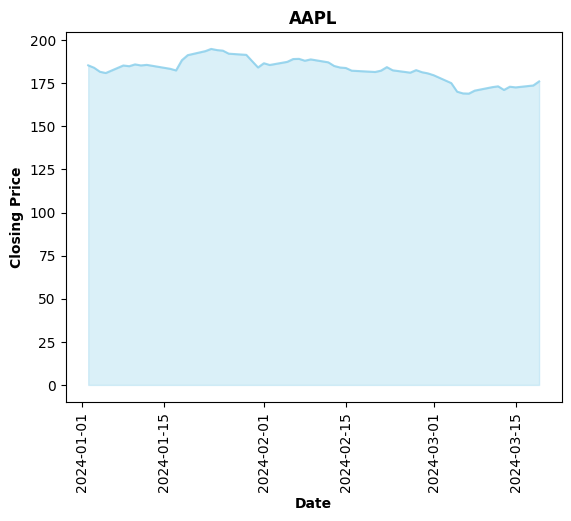

In [47]:
price_plot('AAPL')

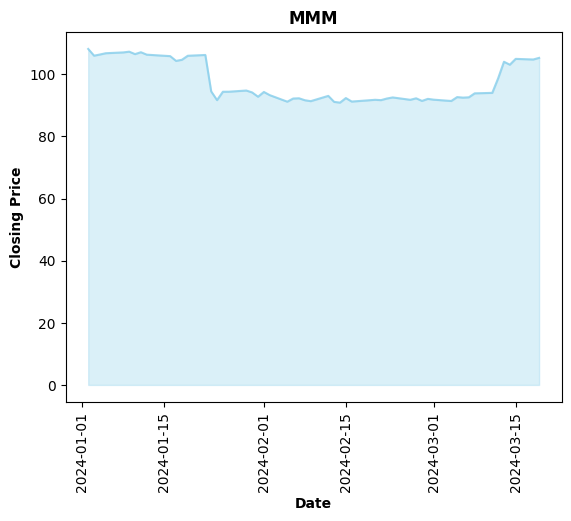

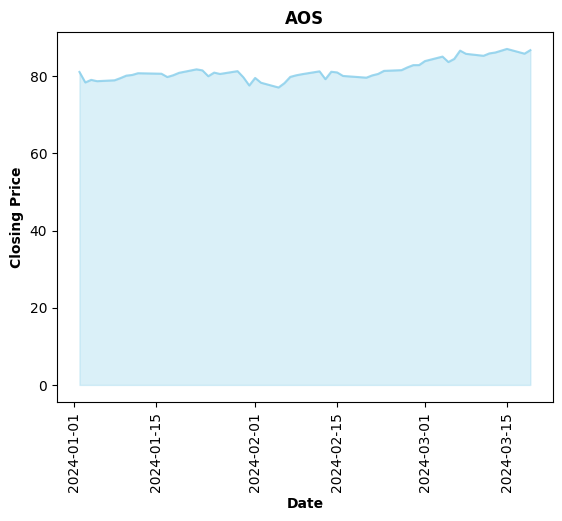

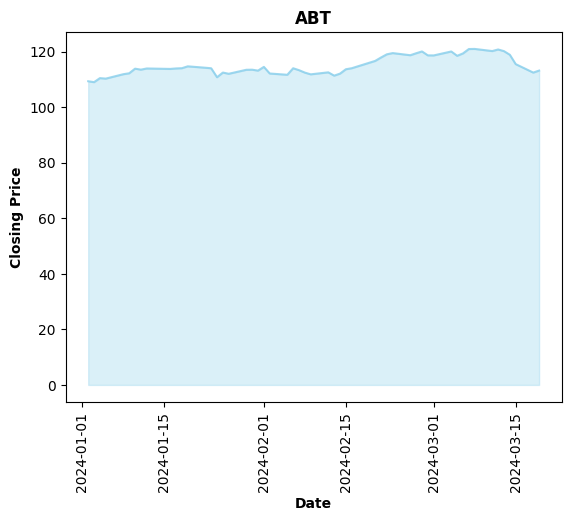

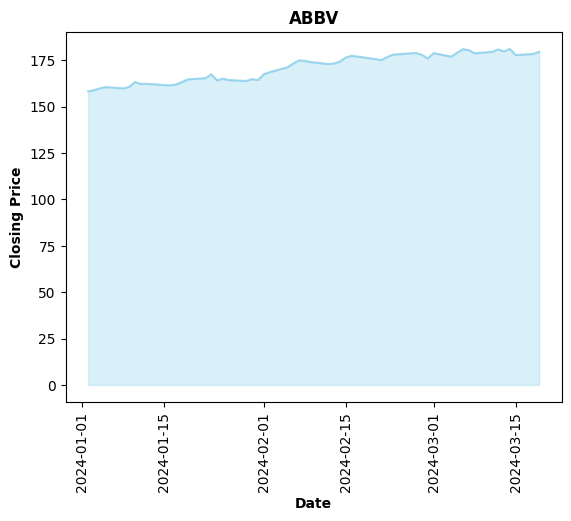

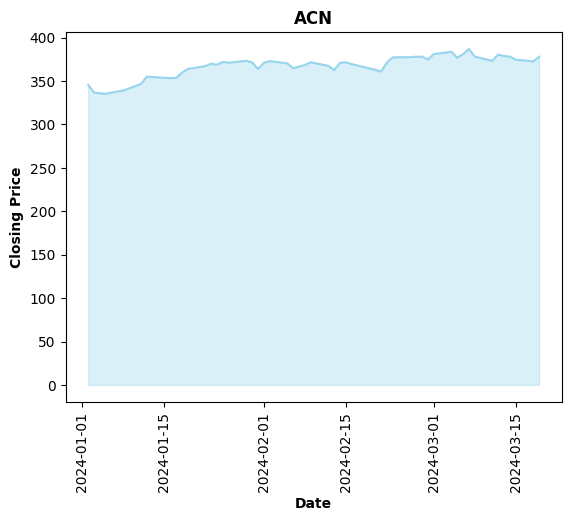

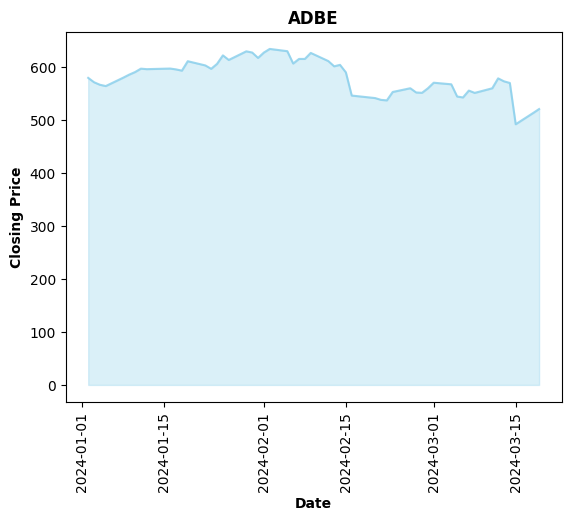

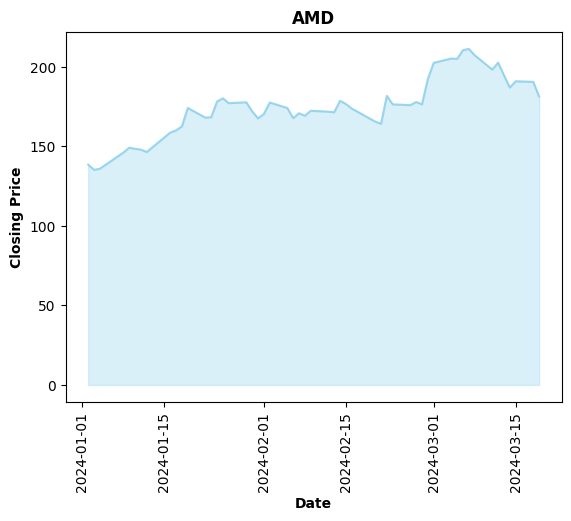

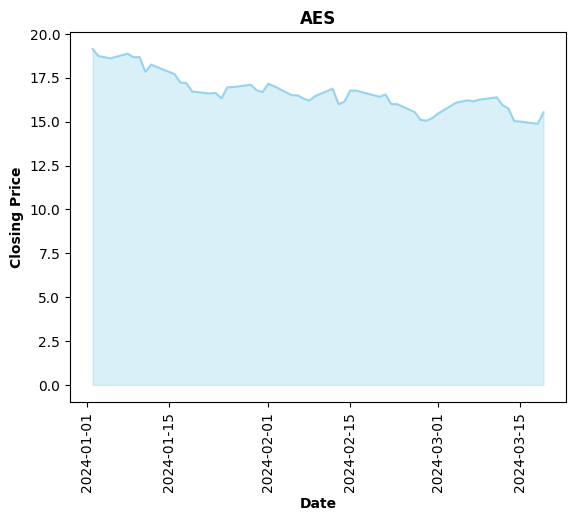

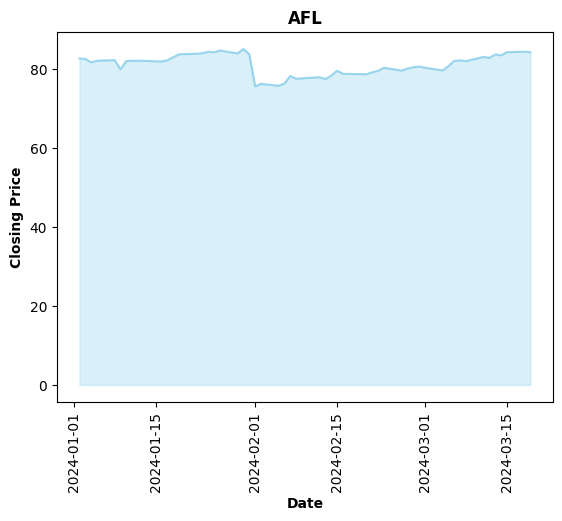

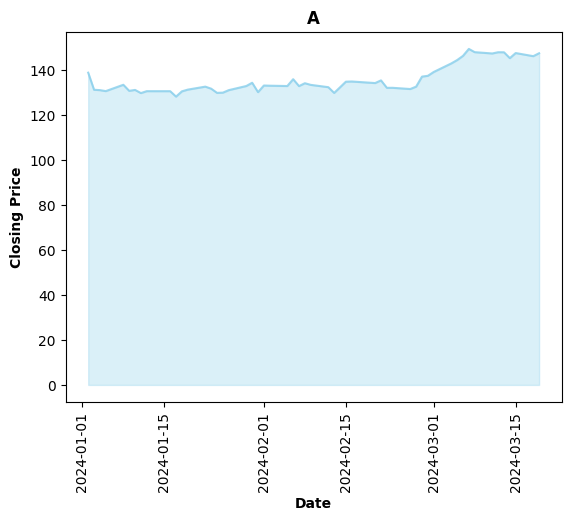

In [48]:
for i in list(df.Symbol)[:10]:
        price_plot(i)